In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
from src import sp_abtest as sab
pd.set_option('display.max_columns', None)
df =pd.read_csv('../data/data_limpios.csv')
df.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
1540,1541,b,2022-03-06,0,fashion,1016,dress,0,"70,27","0,09","0,0",NaN,NaN,south,19.0,f,desktop,18,NaN,firefox,organic,no
1768,1769,a,2022-02-18,0,sports,1880,football,0,"41,64","0,1","0,0",NaN,NaN,west,48.0,m,desktop,15,NaN,safari,organic,no
1325,1326,a,2022-01-17,1,home,1328,lamp,2,"328,12","0,02","643,12",credit_card,same_day,central,34.0,f,mobile,5,yes,chrome,paid,yes
964,965,a,2022-01-21,0,fashion,1256,dress,0,"80,63","0,06","0,0",NaN,NaN,west,32.0,f,tablet,5,NaN,safari,email,no
164,165,a,2022-02-17,0,books,1385,science_fiction,0,"5,27","0,03","0,0",NaN,NaN,north,63.0,m,tablet,20,NaN,chrome,email,no


In [14]:
df['group'].unique()

array(['a', 'b'], dtype=object)

In [19]:
for categoria in df['group'].unique():
    print(categoria)
    df_filtrado = df[df['group'] == categoria]
    display(df_filtrado.describe().T)


a


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.0,518.5,983.0,1498.5,2000.0
conversion,987.0,0.102330,0.303236,0.0,0.0,0.0,0.0,1.0
product_id,987.0,1498.579534,293.157734,1001.0,1248.0,1495.0,1754.5,1998.0
quantity,987.0,0.291793,0.972212,0.0,0.0,0.0,0.0,5.0
customer_age,964.0,43.622407,15.442943,18.0,30.0,43.0,57.0,70.0
session_duration,987.0,15.721378,8.697904,1.0,8.0,16.0,23.0,30.0


b


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.0,489.0,1015.0,1501.0,1997.0
conversion,1013.0,0.144126,0.351391,0.0,0.0,0.0,0.0,1.0
product_id,1013.0,1504.463968,281.364999,1000.0,1266.0,1527.0,1736.0,1997.0
quantity,1013.0,0.448174,1.200514,0.0,0.0,0.0,0.0,5.0
customer_age,996.0,42.705823,15.276836,18.0,29.0,42.0,56.0,70.0
session_duration,1013.0,15.547878,8.690150,1.0,8.0,16.0,23.0,30.0


In [23]:
def exploracion_df_abtesting(df,columna_control):
    for categoria in df[columna_control].unique():
        display(categoria)
        df_filtrado = df[df[columna_control] == categoria]
        display(df_filtrado.describe().T)

In [27]:
sab.exploracion_df_abtesting(df,'group')

'a'

,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.0,518.5,983.0,1498.5,2000.0
conversion,987.0,0.102330,0.303236,0.0,0.0,0.0,0.0,1.0
product_id,987.0,1498.579534,293.157734,1001.0,1248.0,1495.0,1754.5,1998.0
quantity,987.0,0.291793,0.972212,0.0,0.0,0.0,0.0,5.0
customer_age,964.0,43.622407,15.442943,18.0,30.0,43.0,57.0,70.0
session_duration,987.0,15.721378,8.697904,1.0,8.0,16.0,23.0,30.0


'b'

,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.0,489.0,1015.0,1501.0,1997.0
conversion,1013.0,0.144126,0.351391,0.0,0.0,0.0,0.0,1.0
product_id,1013.0,1504.463968,281.364999,1000.0,1266.0,1527.0,1736.0,1997.0
quantity,1013.0,0.448174,1.200514,0.0,0.0,0.0,0.0,5.0
customer_age,996.0,42.705823,15.276836,18.0,29.0,42.0,56.0,70.0
session_duration,1013.0,15.547878,8.690150,1.0,8.0,16.0,23.0,30.0


### graficos de barras ###

Text(0.5, 1.0, 'Quantity')

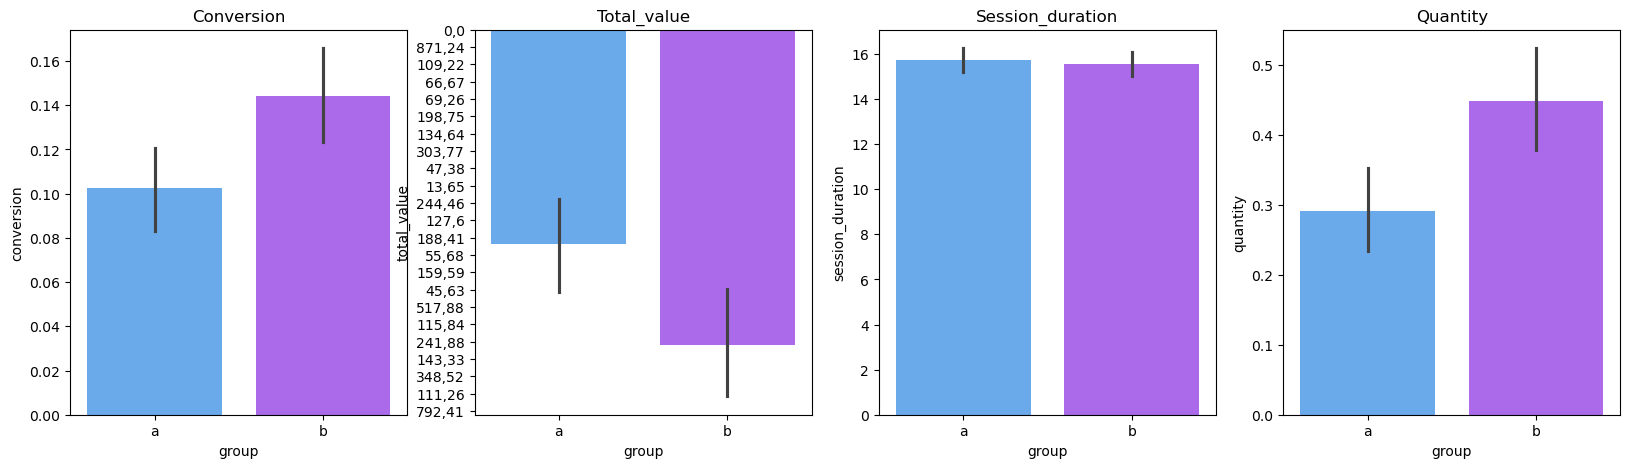

In [38]:
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(20,5))
sns.barplot(x = 'group',y='conversion',data = df,ax = axes[0],hue='group',palette='cool')
axes[0].set_title('Conversion')

sns.barplot(x = 'group',y='total_value',data = df,ax = axes[1],hue='group',palette='cool')
axes[1].set_title('Total_value')

sns.barplot(x = 'group',y='session_duration',data = df,ax = axes[2],hue='group',palette='cool')
axes[2].set_title('Session_duration')

sns.barplot(x = 'group',y='quantity',data = df,ax = axes[3],hue='group',palette='cool')
axes[3].set_title('Quantity')